# Дисциплина Проектный практикум

# Проект: Прогнозирование одобрения кредита (Loan Approval Prediction)

# Команда:

## 1. Богданова Наталья
## 2. Векслер Александр
## 3. Заичкин Артём
## 4. Ставриянов Григорий
## 5. Степанов Сергей
## 6. Бурцев Александр


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Описание задания

Проведите предварительную обработку данных для дальнейшего анализа (используйте материалы Вебинара «Предварительная обработка данных»):

Загрузить данные проекта с сайта кегл в среду разработки

Провести предварительный анализ данных (без визуализации)

Выявить пропуски в данных

Принять решение по обработке найденных пропусков

Выявить категориальные признаки

Преобразовать категориальные данные

Нормировать данные выбранным методом

# Загрузить данные проекта с сайта Kaggle в среду разработки
https://www.kaggle.com/competitions/playground-series-s4e10/data?select=train.csv

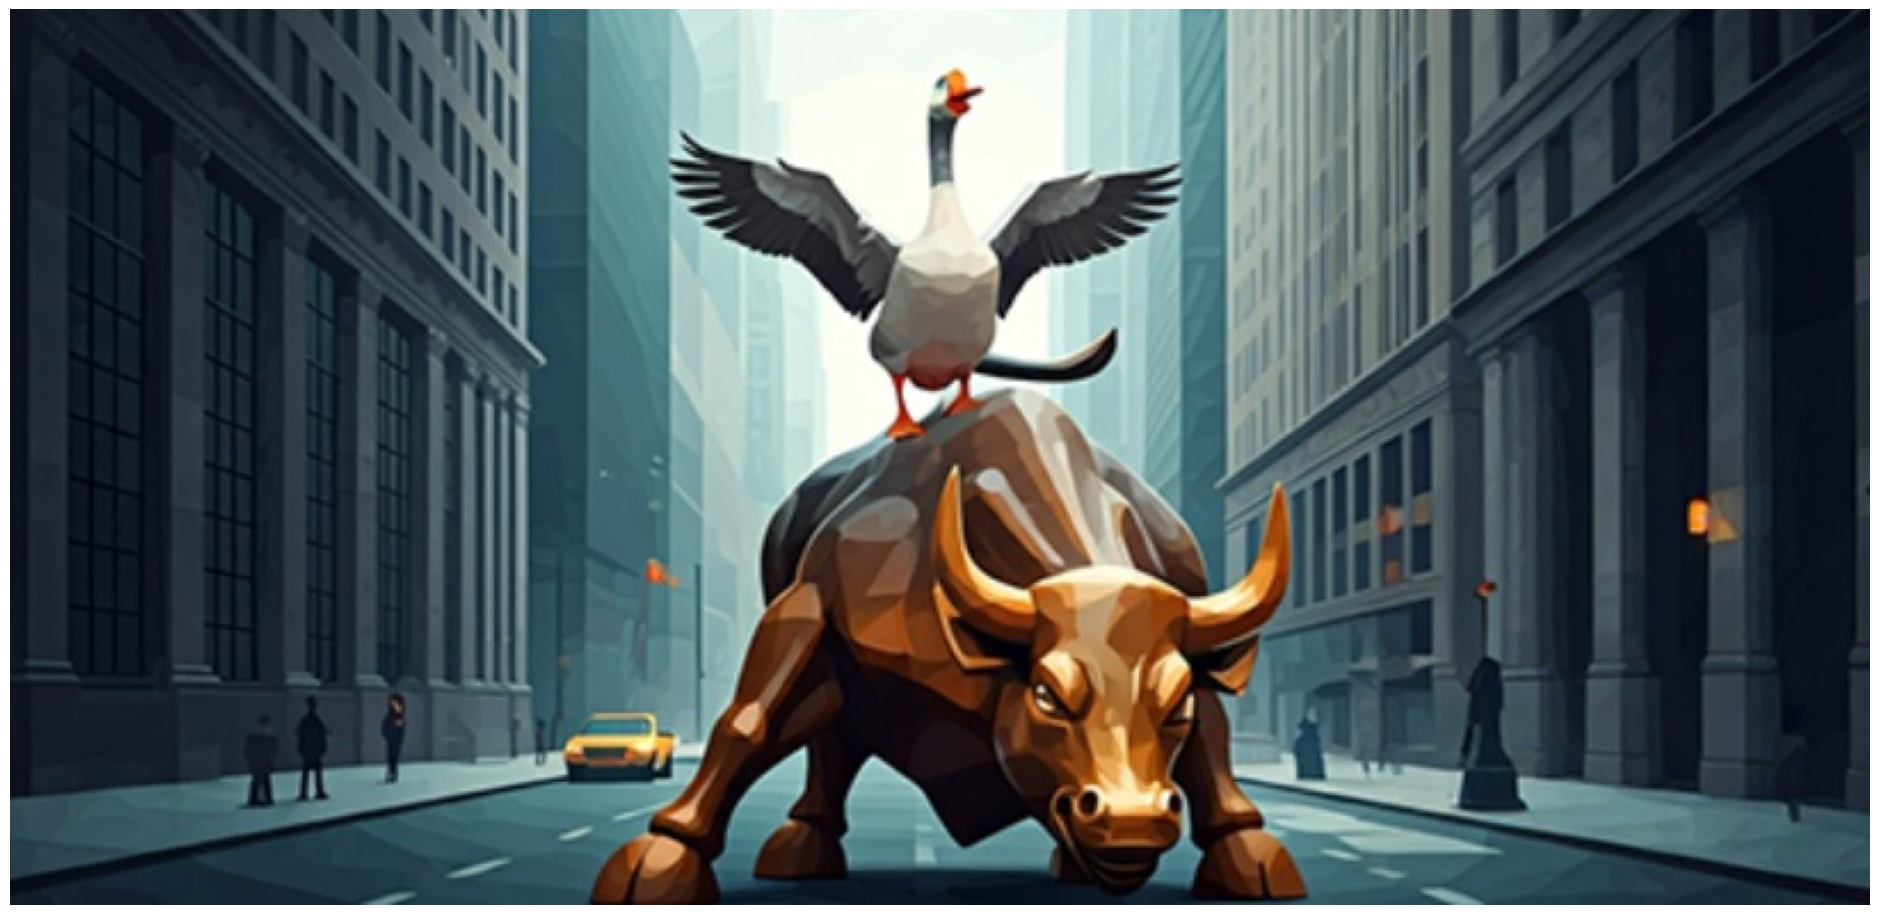

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Colab Notebooks/Проектный практикум/loan.jpg"
img = Image.open(image_path)
plt.figure(figsize=(24, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Метрики для оценки модели
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)



In [ ]:
# загрузка датасета
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проектный практикум/train.csv')

Загрузили 3 датасета: обучающая выборка, тестовая выборка и целевой признак для тестовой выборки.

### Признаки

1   person_age (возраст заемщика)  

2   person_income (доход заемщика)  

3   person_home_ownership             
     (тип жилья: OWN/RENT/OTHER)

4   person_emp_length               
     (стаж работы в годах)

5   loan_intent (цель кредита)   

6   loan_grade (кредитный рейтинг)   

7   loan_amnt (сумма кредита)  

8   loan_int_rate (процентная ставка)

9   loan_percent_income             
     (платеж как % от дохода)

10  cb_person_default_on_file       
     (имелись ли дефолты: Y/N)
     
11  cb_person_cred_hist_length        
     (длина кредитной истории в годах)

# Провести предварительный анализ данных (без визуализации)

In [ ]:
# просматриваем первые 5 строк обучающей выборки
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
# просматриваем типы данных и наличие пропусков обучающей выборки
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
# просматриваем описательную статистику обучающей выборки
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Выявить пропуски в данных

# Принять решение по обработке найденных пропусков

In [ ]:
# выявить пропуски
missing_values = train.isnull().sum()
print("Пропущенные значения в каждом столбце датасета train:")
print(missing_values)
print(missing_values[missing_values > 0])

Пропущенные значения в каждом столбце датасета train:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Series([], dtype: int64)


In [ ]:
# Проверка на дубликаты
print("Количество дубликатов train:", train.duplicated().sum())
# Удаление дубликатов
# train = train.drop_duplicates()
# print("Размерность данных после очистки train:", train.shape)

Количество дубликатов train: 0


Пропуски отсутствуют в выборке. Таким образом нет никакой необходимости в их заполнении.

Дубликаты отсутствуют.

# Исследовательский анализ

# Выбросы

Просмотрим выбросы во всех столбцах датасета с количественными данными. Заменим анамалии средними значениями по каждому признаку.

,person_age
count,58645.000000
mean,27.550857
std,6.033216
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,123.000000


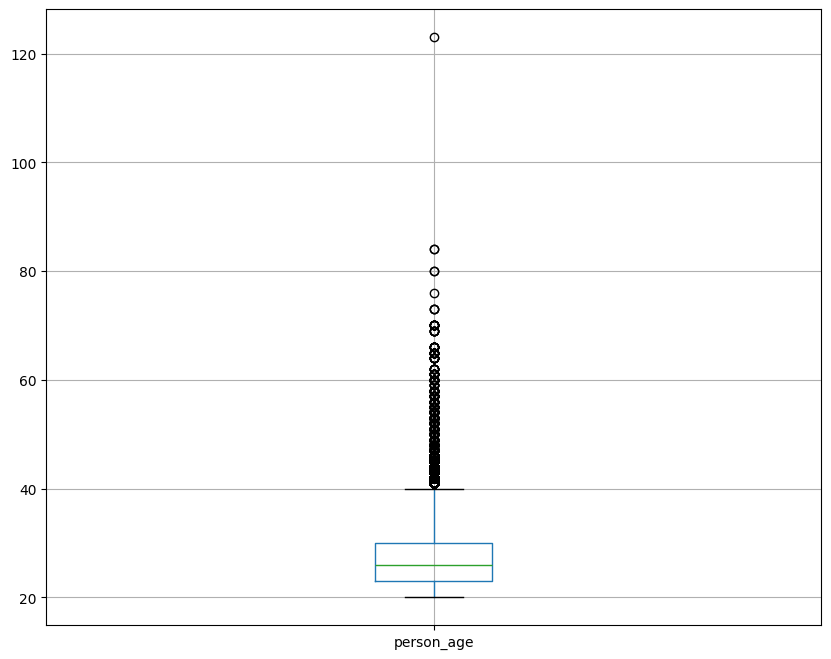

In [ ]:
train.boxplot(column='person_age', figsize=(10,8))
train['person_age'].describe()

,person_income
count,5.864500e+04
mean,6.404617e+04
std,3.793111e+04
min,4.200000e+03
25%,4.200000e+04
50%,5.800000e+04
75%,7.560000e+04
max,1.900000e+06


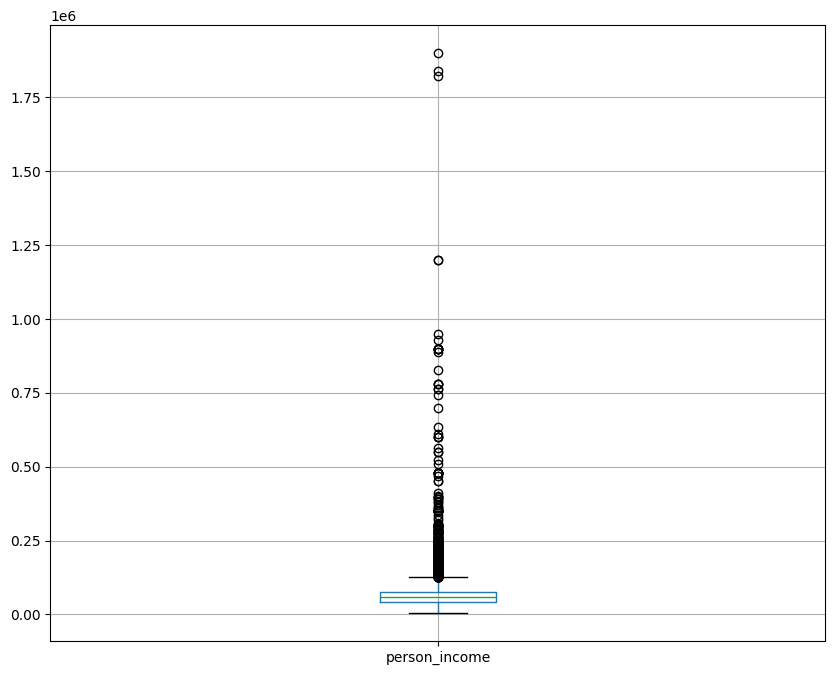

In [ ]:
train.boxplot(column='person_income', figsize=(10,8))
train['person_income'].describe()

,person_emp_length
count,58645.000000
mean,4.701015
std,3.959784
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


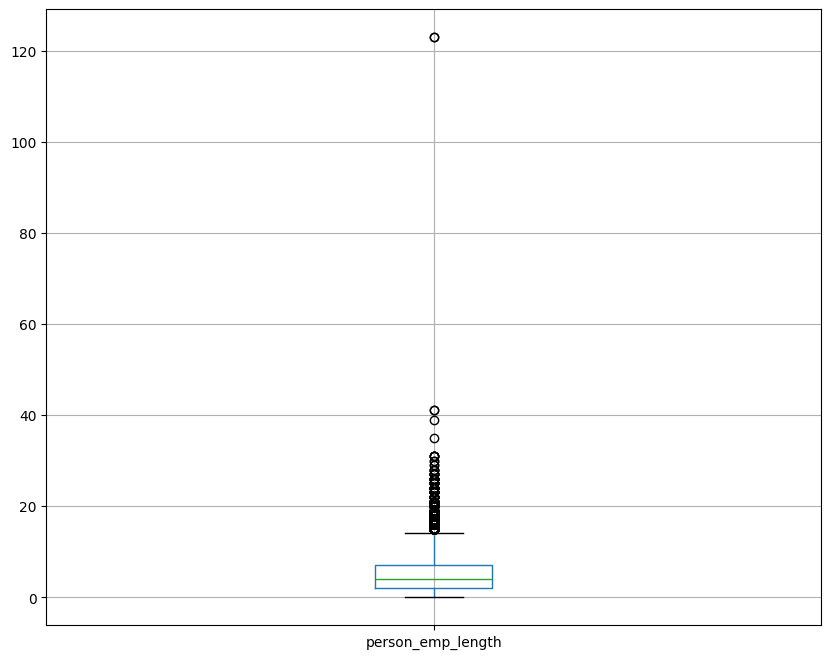

In [ ]:
train.boxplot(column='person_emp_length', figsize=(10,8))
train['person_emp_length'].describe()

,loan_amnt
count,58645.000000
mean,9217.556518
std,5563.807384
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12000.000000
max,35000.000000


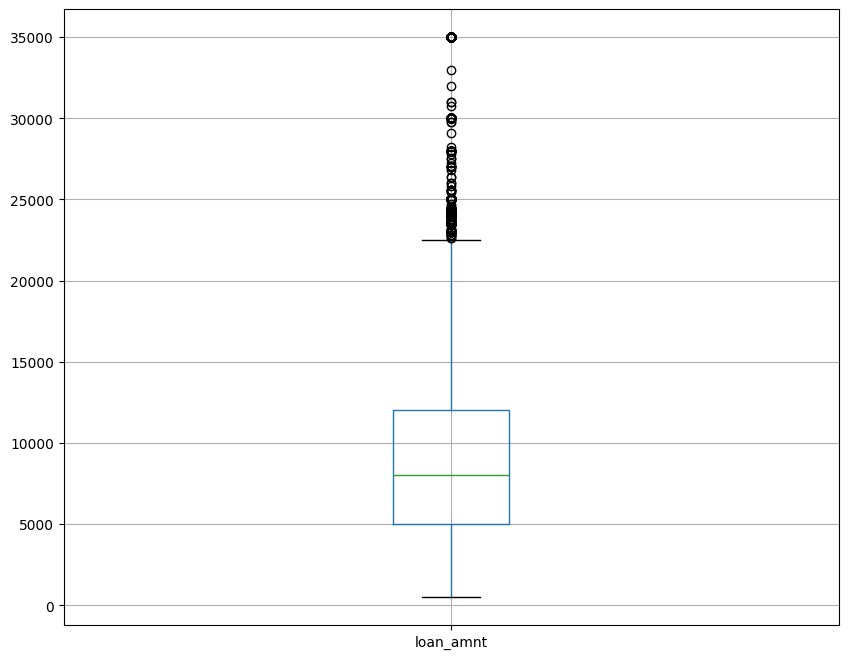

In [ ]:
train.boxplot(column='loan_amnt', figsize=(10,8))
train['loan_amnt'].describe()

,loan_int_rate
count,58645.000000
mean,10.677874
std,3.034697
min,5.420000
25%,7.880000
50%,10.750000
75%,12.990000
max,23.220000


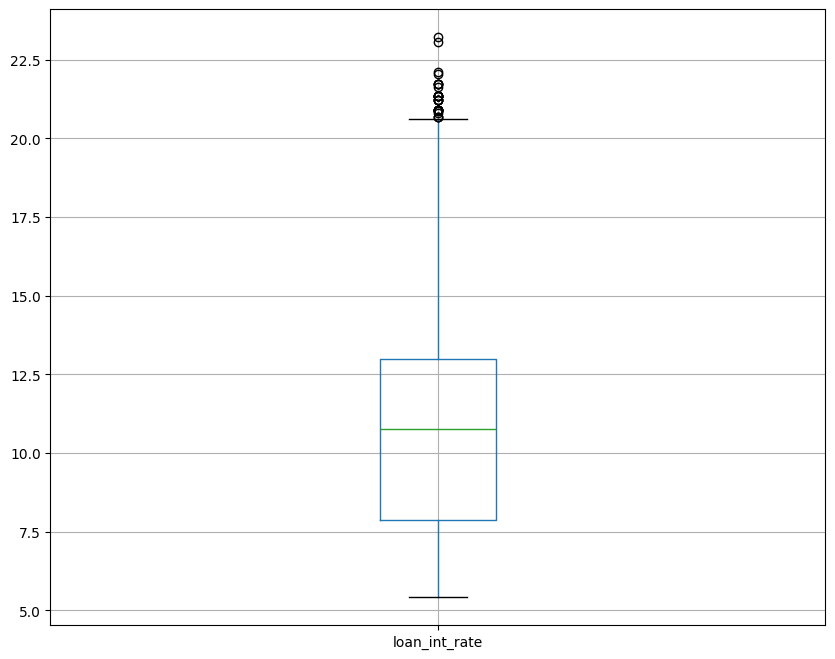

In [ ]:
train.boxplot(column='loan_int_rate', figsize=(10,8))
train['loan_int_rate'].describe()

,loan_percent_income
count,58645.000000
mean,0.159238
std,0.091692
min,0.000000
25%,0.090000
50%,0.140000
75%,0.210000
max,0.830000


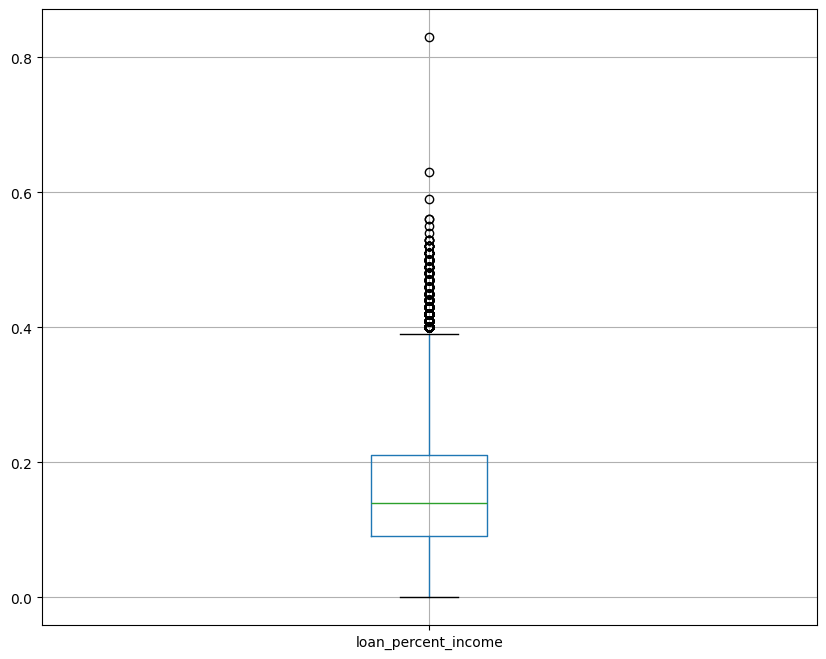

In [ ]:
train.boxplot(column='loan_percent_income', figsize=(10,8))
train['loan_percent_income'].describe()

,cb_person_cred_hist_length
count,58645.000000
mean,5.813556
std,4.029196
min,2.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


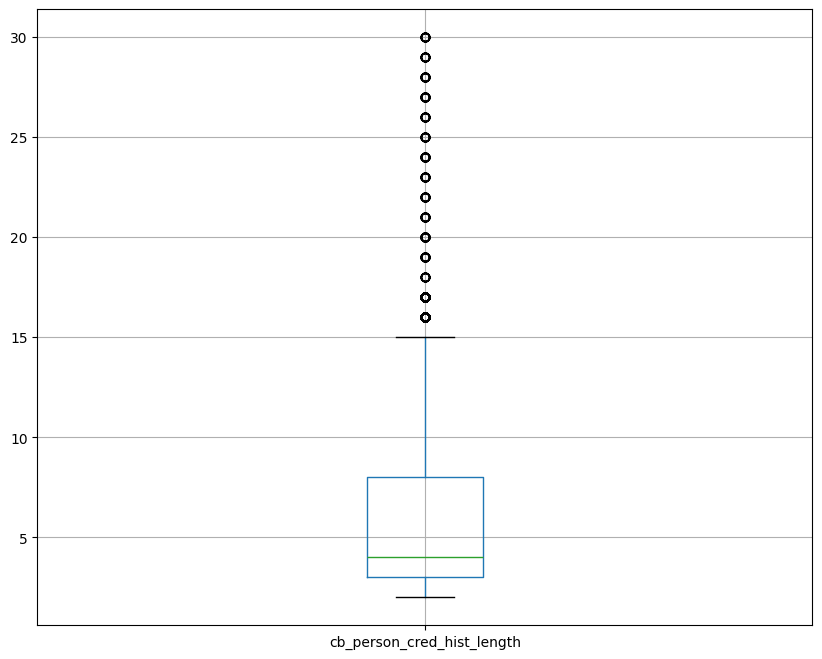

In [ ]:
train.boxplot(column='cb_person_cred_hist_length', figsize=(10,8))
train['cb_person_cred_hist_length'].describe()

In [ ]:
# уберем значимые аномалии в train
train.loc[(train['person_age'] > 100), 'person_age'] = train['person_age'].mean()

train.loc[(train['person_income'] > 100000), 'person_income'] = train['person_income'].mean()

train.loc[(train['person_emp_length'] > 20), 'person_emp_length'] = train['person_emp_length'].mean()

train.loc[(train['loan_amnt'] > 25000), 'loan_amnt'] = train['loan_amnt'].mean()

train.loc[(train['loan_int_rate'] > 22), 'loan_int_rate'] = train['loan_int_rate'].mean()

train.loc[(train['loan_percent_income'] > 0.6), 'loan_percent_income'] = train['loan_percent_income'].mean()

train.loc[(train['cb_person_cred_hist_length'] > 15), 'cb_person_cred_hist_length'] = train['cb_person_cred_hist_length'].mean()


<ipython-input-17-c234ad168d62>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.550856850541393' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[(train['person_age'] > 100), 'person_age'] = train['person_age'].mean()
<ipython-input-17-c234ad168d62>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '64046.17287066246' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[(train['person_income'] > 100000), 'person_income'] = train['person_income'].mean()
<ipython-input-17-c234ad168d62>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9217.556518032228' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.l

# Выявить категориальные признаки

# Преобразовать категориальные данные

In [ ]:
# найти все признаки, в которых первое значение - строка
def find_cat(train, num_uniq=4):
    for name in train.columns:
        s = ''
        s += name
        if (type(train[name][0]) == str):
            s += ' строка,'
        if (train[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)

find_cat(train)

person_home_ownership строка, мало уникальных
loan_intent строка,
loan_grade строка,
cb_person_default_on_file строка, мало уникальных
loan_status мало уникальных


Следовательно, категориальные признаки:

- person_home_ownership

- loan_intent

- loan_grade

- cb_person_default_on_file

In [ ]:
# One-hot-encoding: получение дамми-признаков
train = pd.get_dummies(train, drop_first=True)

In [ ]:
train.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,37.0,35000.0,0.0,6000.0,11.49,0.17,14.0,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,22.0,56000.0,6.0,4000.0,13.35,0.07,2.0,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,29.0,28800.0,8.0,6000.0,8.90,0.21,10.0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,30.0,70000.0,14.0,12000.0,11.11,0.17,5.0,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,22.0,60000.0,2.0,6000.0,6.92,0.10,3.0,0,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58645 non-null  int64  
 1   person_age                   58645 non-null  float64
 2   person_income                58645 non-null  float64
 3   person_emp_length            58645 non-null  float64
 4   loan_amnt                    58645 non-null  float64
 5   loan_int_rate                58645 non-null  float64
 6   loan_percent_income          58645 non-null  float64
 7   cb_person_cred_hist_length   58645 non-null  float64
 8   loan_status                  58645 non-null  int64  
 9   person_home_ownership_OTHER  58645 non-null  bool   
 10  person_home_ownership_OWN    58645 non-null  bool   
 11  person_home_ownership_RENT   58645 non-null  bool   
 12  loan_intent_EDUCATION        58645 non-null  bool   
 13  loan_intent_HOME

Преобразовали следующие категориальные признаки:

- person_home_ownership
(тип жилья: OWN/RENT/OTHER)

- loan_intent (цель кредита)

- loan_grade (кредитный рейтинг)

- cb_person_default_on_file
(имелись ли дефолты: Y/N)

Для преобразования использовали OrdinalEncoder

# Поиск корреляции между признаками

<Axes: >

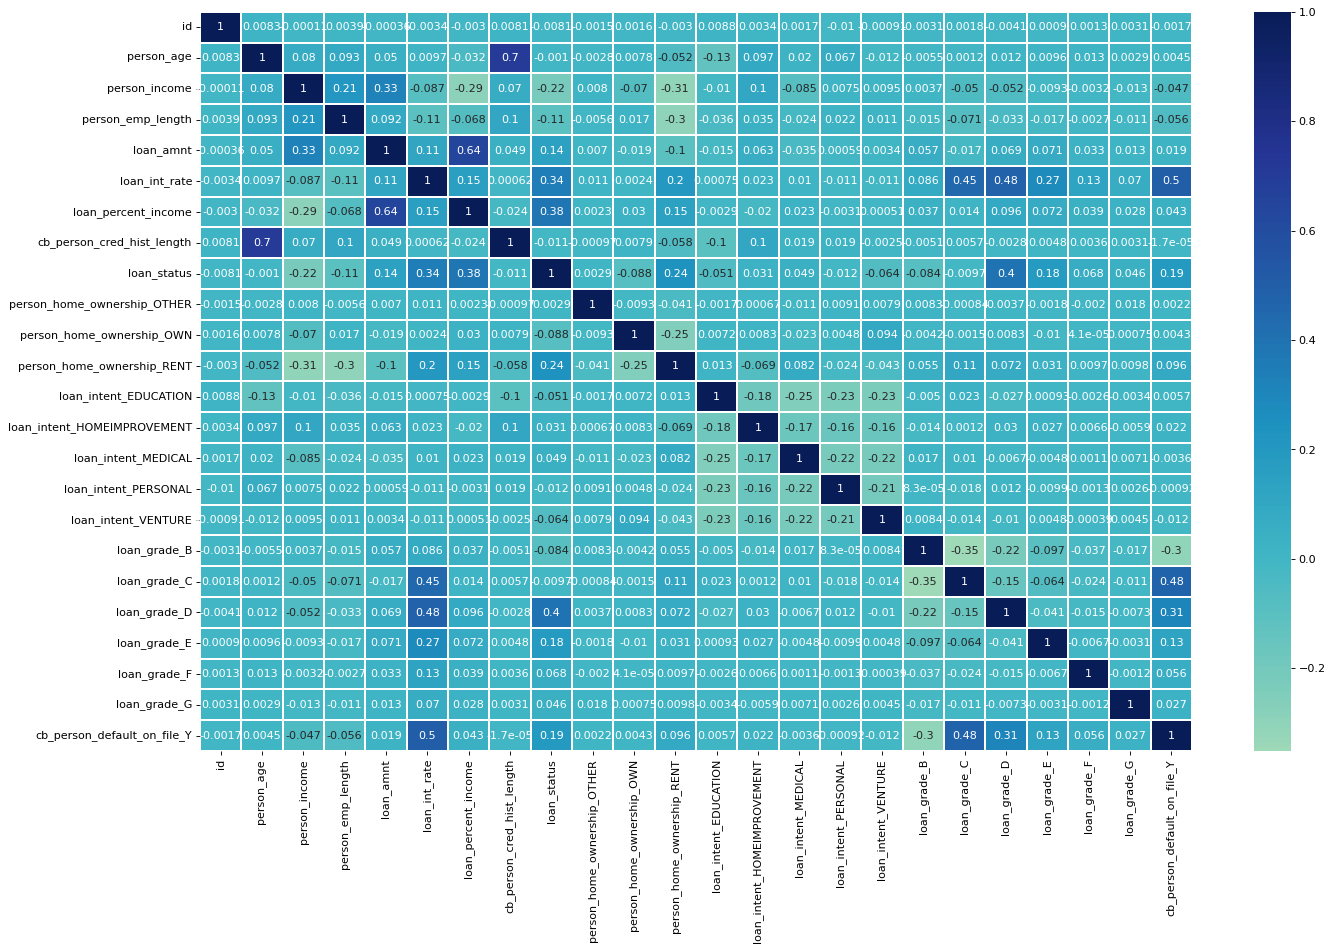

In [ ]:
# Рассчитываем корреляцию между признаками и визуализируем
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(train.corr(),  cmap='YlGnBu', center=0, annot=True, linewidths = 0.1)

In [ ]:
# Строим матрицу корреляции
corr_matrix = train.corr()
print(corr_matrix)

                                   id  person_age  person_income  \
id                           1.000000    0.008339      -0.000106   
person_age                   0.008339    1.000000       0.079759   
person_income               -0.000106    0.079759       1.000000   
person_emp_length            0.003874    0.093015       0.206633   
loan_amnt                   -0.000361    0.050310       0.325327   
loan_int_rate               -0.003410    0.009667      -0.086706   
loan_percent_income         -0.002964   -0.032472      -0.292036   
cb_person_cred_hist_length   0.008073    0.701830       0.069587   
loan_status                 -0.008138   -0.001022      -0.220480   
person_home_ownership_OTHER -0.001452   -0.002829       0.008025   
person_home_ownership_OWN    0.001638    0.007810      -0.069529   
person_home_ownership_RENT  -0.003035   -0.051576      -0.306826   
loan_intent_EDUCATION        0.008843   -0.127388      -0.010256   
loan_intent_HOMEIMPROVEMENT  0.003434    0.09674

На основе представленной матрицы корреляции можно сделать следующие выводы о взаимосвязях между переменными:

### Сильные корреляции (|r| > 0.5)
Возраст и кредитная история:

person_age и cb_person_cred_hist_length: 0.70

Ожидаемая сильная связь - чем старше человек, тем длиннее его кредитная история

Доход и сумма займа:

person_income и loan_amnt: 0.33

Люди с более высоким доходом берут большие кредиты

Процентная ставка и дефолт:

loan_int_rate и cb_person_default_on_file_Y: 0.50

Клиентам с прошлыми дефолтами назначают более высокие ставки

Процентная ставка и кредитный рейтинг:

Сильная связь с градациями (grade C: 0.45, grade D: 0.48)

Чем хуже кредитный рейтинг, тем выше процентная ставка

### Умеренные корреляции (0.3 < |r| < 0.5)
Статус займа (дефолт):

Положительная связь с процентной ставкой (0.34)

Положительная связь с loan_percent_income (0.38)

Положительная связь с grade D (0.40)

Положительная связь с арендой жилья (0.24)

Аренда жилья:

Отрицательная связь с доходом (-0.31)

Положительная связь с процентной ставкой (0.20)

### Слабые корреляции (|r| < 0.3)
Большинство других связей слабые, но некоторые примечательные:

Отрицательная связь между владением жильем (OWN) и статусом займа (-0.09)

Положительная связь между целью кредита "медицина" и статусом займа (0.05)


# Нормировать данные выбранным методом

In [ ]:
scaler = StandardScaler()
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler.fit_transform(train[numeric])
train[numeric] = scaler.transform(train[numeric])


In [ ]:
train.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,1.569824,-1.155451,-1.233761,-0.584146,0.268026,0.117670,2.675674,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,-0.921757,-0.039861,0.360327,-0.963129,0.881266,-0.973693,-1.053790,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,0.240981,-1.484815,0.891690,-0.584146,-0.585896,0.554215,1.432519,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,0.407086,0.703865,2.485778,0.552801,0.142740,0.117670,-0.121424,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,-0.921757,0.172632,-0.702398,-0.584146,-1.238700,-0.646284,-0.743002,0,False,...,True,False,False,False,False,False,False,False,False,False


Масштабирование использовали для количественных данных:
numeric = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

при помощи StandardScaler()

Признаки:

- person_age (возраст заемщика)

- person_income (доход заемщика)

- person_emp_length
(стаж работы в годах)

- loan_amnt (сумма кредита)

- loan_int_rate (процентная ставка)

- loan_percent_income
(платеж как % от дохода)

- cb_person_cred_hist_length
(длина кредитной истории в годах)

# Этап 2. Создайте новые признаки в ваших данных (используйте материалы Вебинара «Инжиниринг признаков и выбор моделей»):

1. Сгенерируйте новые признаки на основе существующих. Используйте разные методы.

2. Проведите отбор сгенерированных признаков, а также тех, что уже были в датасете.

3. Заполните вкладку Инжиниринг признаков


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Создаем копию датафрейма для работы
train_eng = train.copy()

# 1. Используем полиноминальные признаки
polynomal_columns = ['person_age', 'loan_amnt']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(train_eng[polynomal_columns])
poly_feature_names = poly.get_feature_names_out(train_eng[polynomal_columns].columns)
# Добавляем в датафрейм
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
# Удаляем только те колонки, которые совпадают с полиномиальными именами
columns_to_drop = set(polynomal_columns) & set(poly_feature_names)
poly_df = poly_df.drop(columns=columns_to_drop)

train_eng = pd.concat([train_eng, poly_df], axis=1)

# # 2. Создаем новые признаки на основе существующих числовых признаков
# # Логарифмирование признаков (может помочь с правосторонней асимметрией)
train_eng['log_person_income'] = np.log1p(train_eng['person_income'])
train_eng['log_loan_amnt'] = np.log1p(train_eng['loan_amnt'])

# # 3. Взаимодействие признаков
train_eng['income_to_loan_ratio'] = train_eng['person_income'] / train_eng['loan_amnt'] #Отношение дохода к сумме кредита
train_eng['income_per_age'] = train_eng['person_income'] / train_eng['person_age'] #Отношение уровня дохода к возрасту
train_eng['emp_length_to_age'] = train_eng['person_emp_length'] / (train_eng['person_age'] + 1) #Отношение кредита к возрасту
train_eng['credit_history_to_age'] = train_eng['cb_person_cred_hist_length'] / (train_eng['person_age'] + 1) #Отношение кредитной истории к возрасту

# # 4. Биннинг (разбиение на категории) числовых признаков
train_eng['age_bin'] = pd.cut(train_eng['person_age'], bins=5, labels=False)
train_eng['income_bin'] = pd.qcut(train_eng['person_income'], q=4, labels=False)
train_eng['loan_amnt_bin'] = pd.qcut(train_eng['loan_amnt'], q=4, labels=False)

# Проверяем новые признаки
print(train_eng.shape)
train_eng.head()

(58645, 36)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_amnt^2,log_person_income,log_loan_amnt,income_to_loan_ratio,income_per_age,emp_length_to_age,credit_history_to_age,age_bin,income_bin,loan_amnt_bin
0,0,1.569824,-1.155451,-1.233761,-0.584146,0.268026,0.117670,2.675674,0,False,...,0.341227,NaN,-0.877422,1.978016,-0.736038,-0.480096,1.041190,1,0,1
1,1,-0.921757,-0.039861,0.360327,-0.963129,0.881266,-0.973693,-1.053790,0,False,...,0.927617,-0.040678,-3.300321,0.041387,0.043245,4.605210,-13.468119,0,1,0
2,2,0.240981,-1.484815,0.891690,-0.584146,-0.585896,0.554215,1.432519,0,False,...,0.341227,NaN,-0.877422,2.541855,-6.161549,0.718536,1.154345,0,0,1
3,3,0.407086,0.703865,2.485778,0.552801,0.142740,0.117670,-0.121424,0,False,...,0.305589,0.532899,0.440060,1.273270,1.729031,1.766614,-0.086295,0,3,2
4,4,-0.921757,0.172632,-0.702398,-0.584146,-1.238700,-0.646284,-0.743002,0,False,...,0.341227,0.159251,-0.877422,-0.295528,-0.187286,-8.977104,-9.496039,0,2,1


1. Полиномиальные признаки
Исходные признаки: person_age, loan_amnt

Созданные признаки:

person_age^2, person_age loan_amnt, loan_amnt^2 (при degree=2)

Зачем: Полиномиальные признаки помогают модели улавливать нелинейные зависимости между переменными, что может улучшить предсказательную способность.

2. Логарифмирование признаков
Исходные признаки: person_income, loan_amnt

Созданные признаки:

log_person_income = log(1 + person_income)

log_loan_amnt = log(1 + loan_amnt)

Зачем: Логарифмирование помогает уменьшить влияние выбросов и сделать распределение более нормальным, особенно если данные имеют правостороннюю асимметрию.

3. Взаимодействия признаков
Созданы новые соотношения признаков:

income_to_loan_ratio — отношение дохода к сумме кредита

income_per_age — доход на единицу возраста

emp_length_to_age — стаж работы относительно возраста

credit_history_to_age — длина кредитной истории по отношению к возрасту

Зачем: выявление скрытых взаимосвязей между показателями. Эти соотношения могут лучше отражать реальное финансовое положение заемщика, чем абсолютные значения.

4. Биннинг (категоризация)
Признаки:

age_bin — разбиение возраста на 5 равных интервалов

income_bin — квантильное разбиение дохода на 4 категории

loan_amnt_bin — квантильное разбиение суммы кредита на 4 категории
Зачем: снижение влияния выбросов, упрощение модели, возможность работы моделей, чувствительных к категориальным данным.

# Построим графики распределений полученных признаков

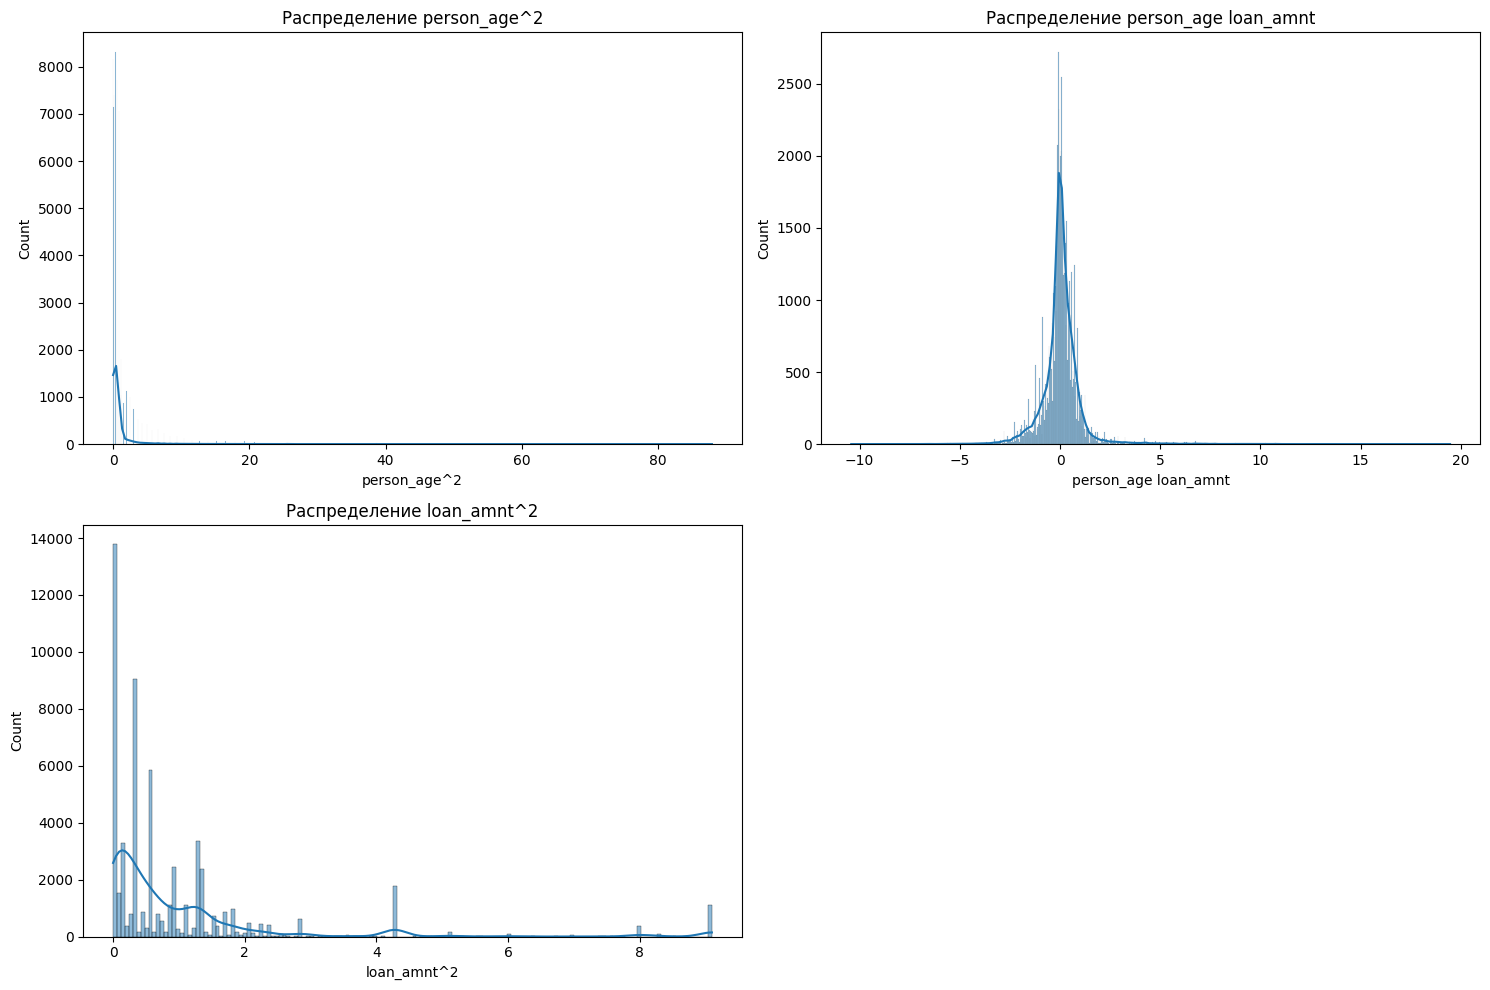

In [ ]:
# Полиномиальные признаки
plt.figure(figsize=(15, 10))
for i, col in enumerate(poly_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_eng[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

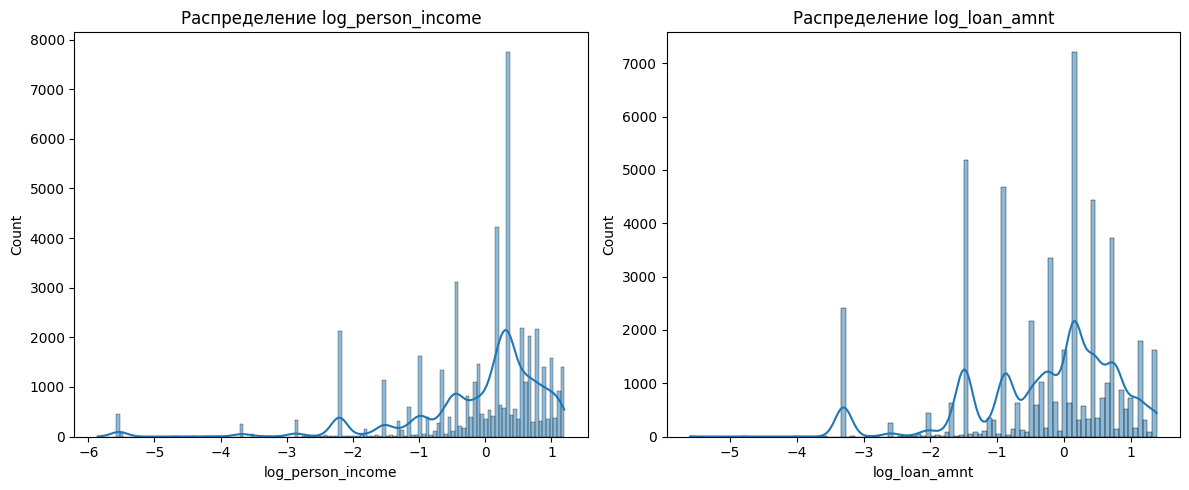

In [ ]:
# Логарифмируемые признаки
plt.figure(figsize=(12, 5))
for i, col in enumerate(['log_person_income', 'log_loan_amnt'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(train_eng[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

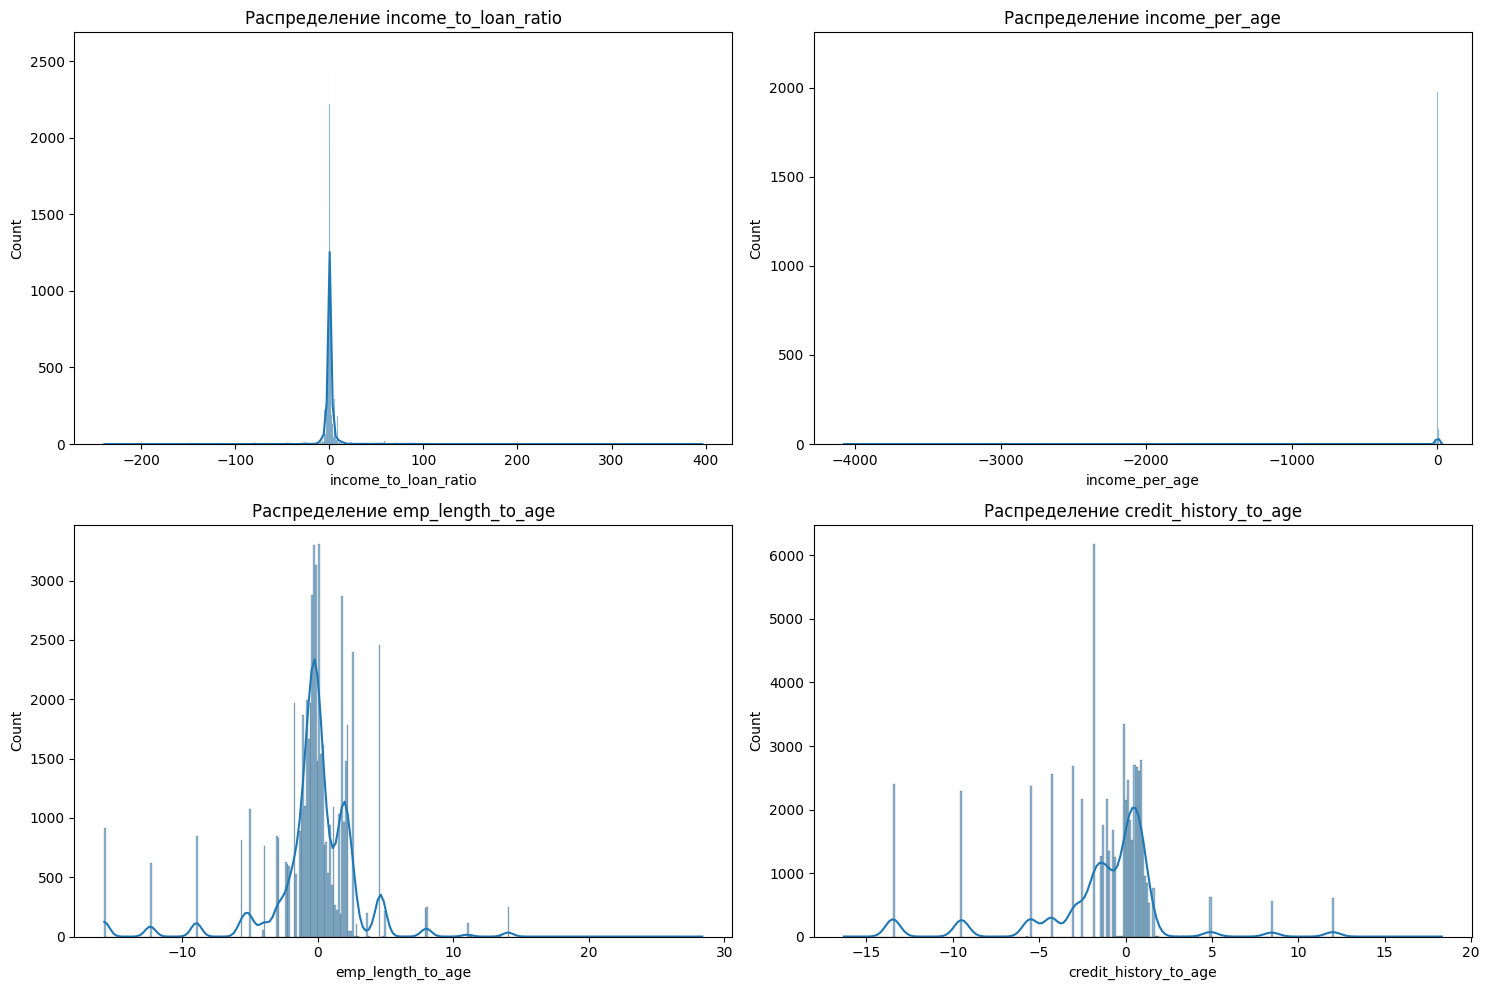

In [ ]:
# Признаки взаимодействия
plt.figure(figsize=(15, 10))
for i, col in enumerate(['income_to_loan_ratio', 'income_per_age',
                        'emp_length_to_age', 'credit_history_to_age'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_eng[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

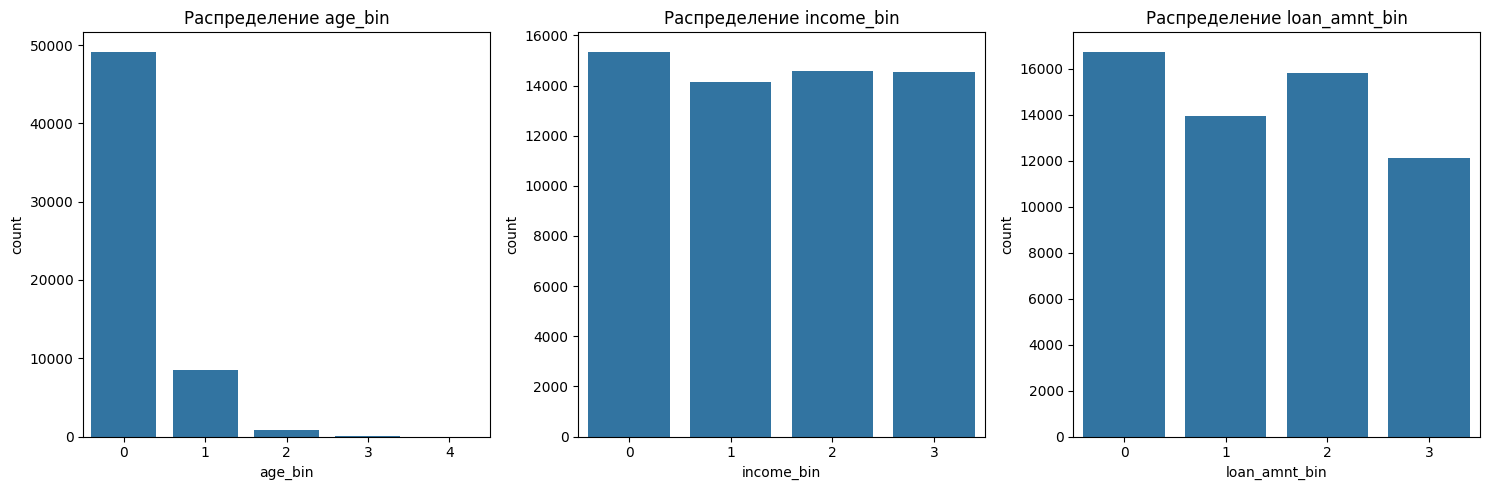

In [ ]:
# Биннинг признаки
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age_bin', 'income_bin', 'loan_amnt_bin'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=train_eng)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

<Axes: >

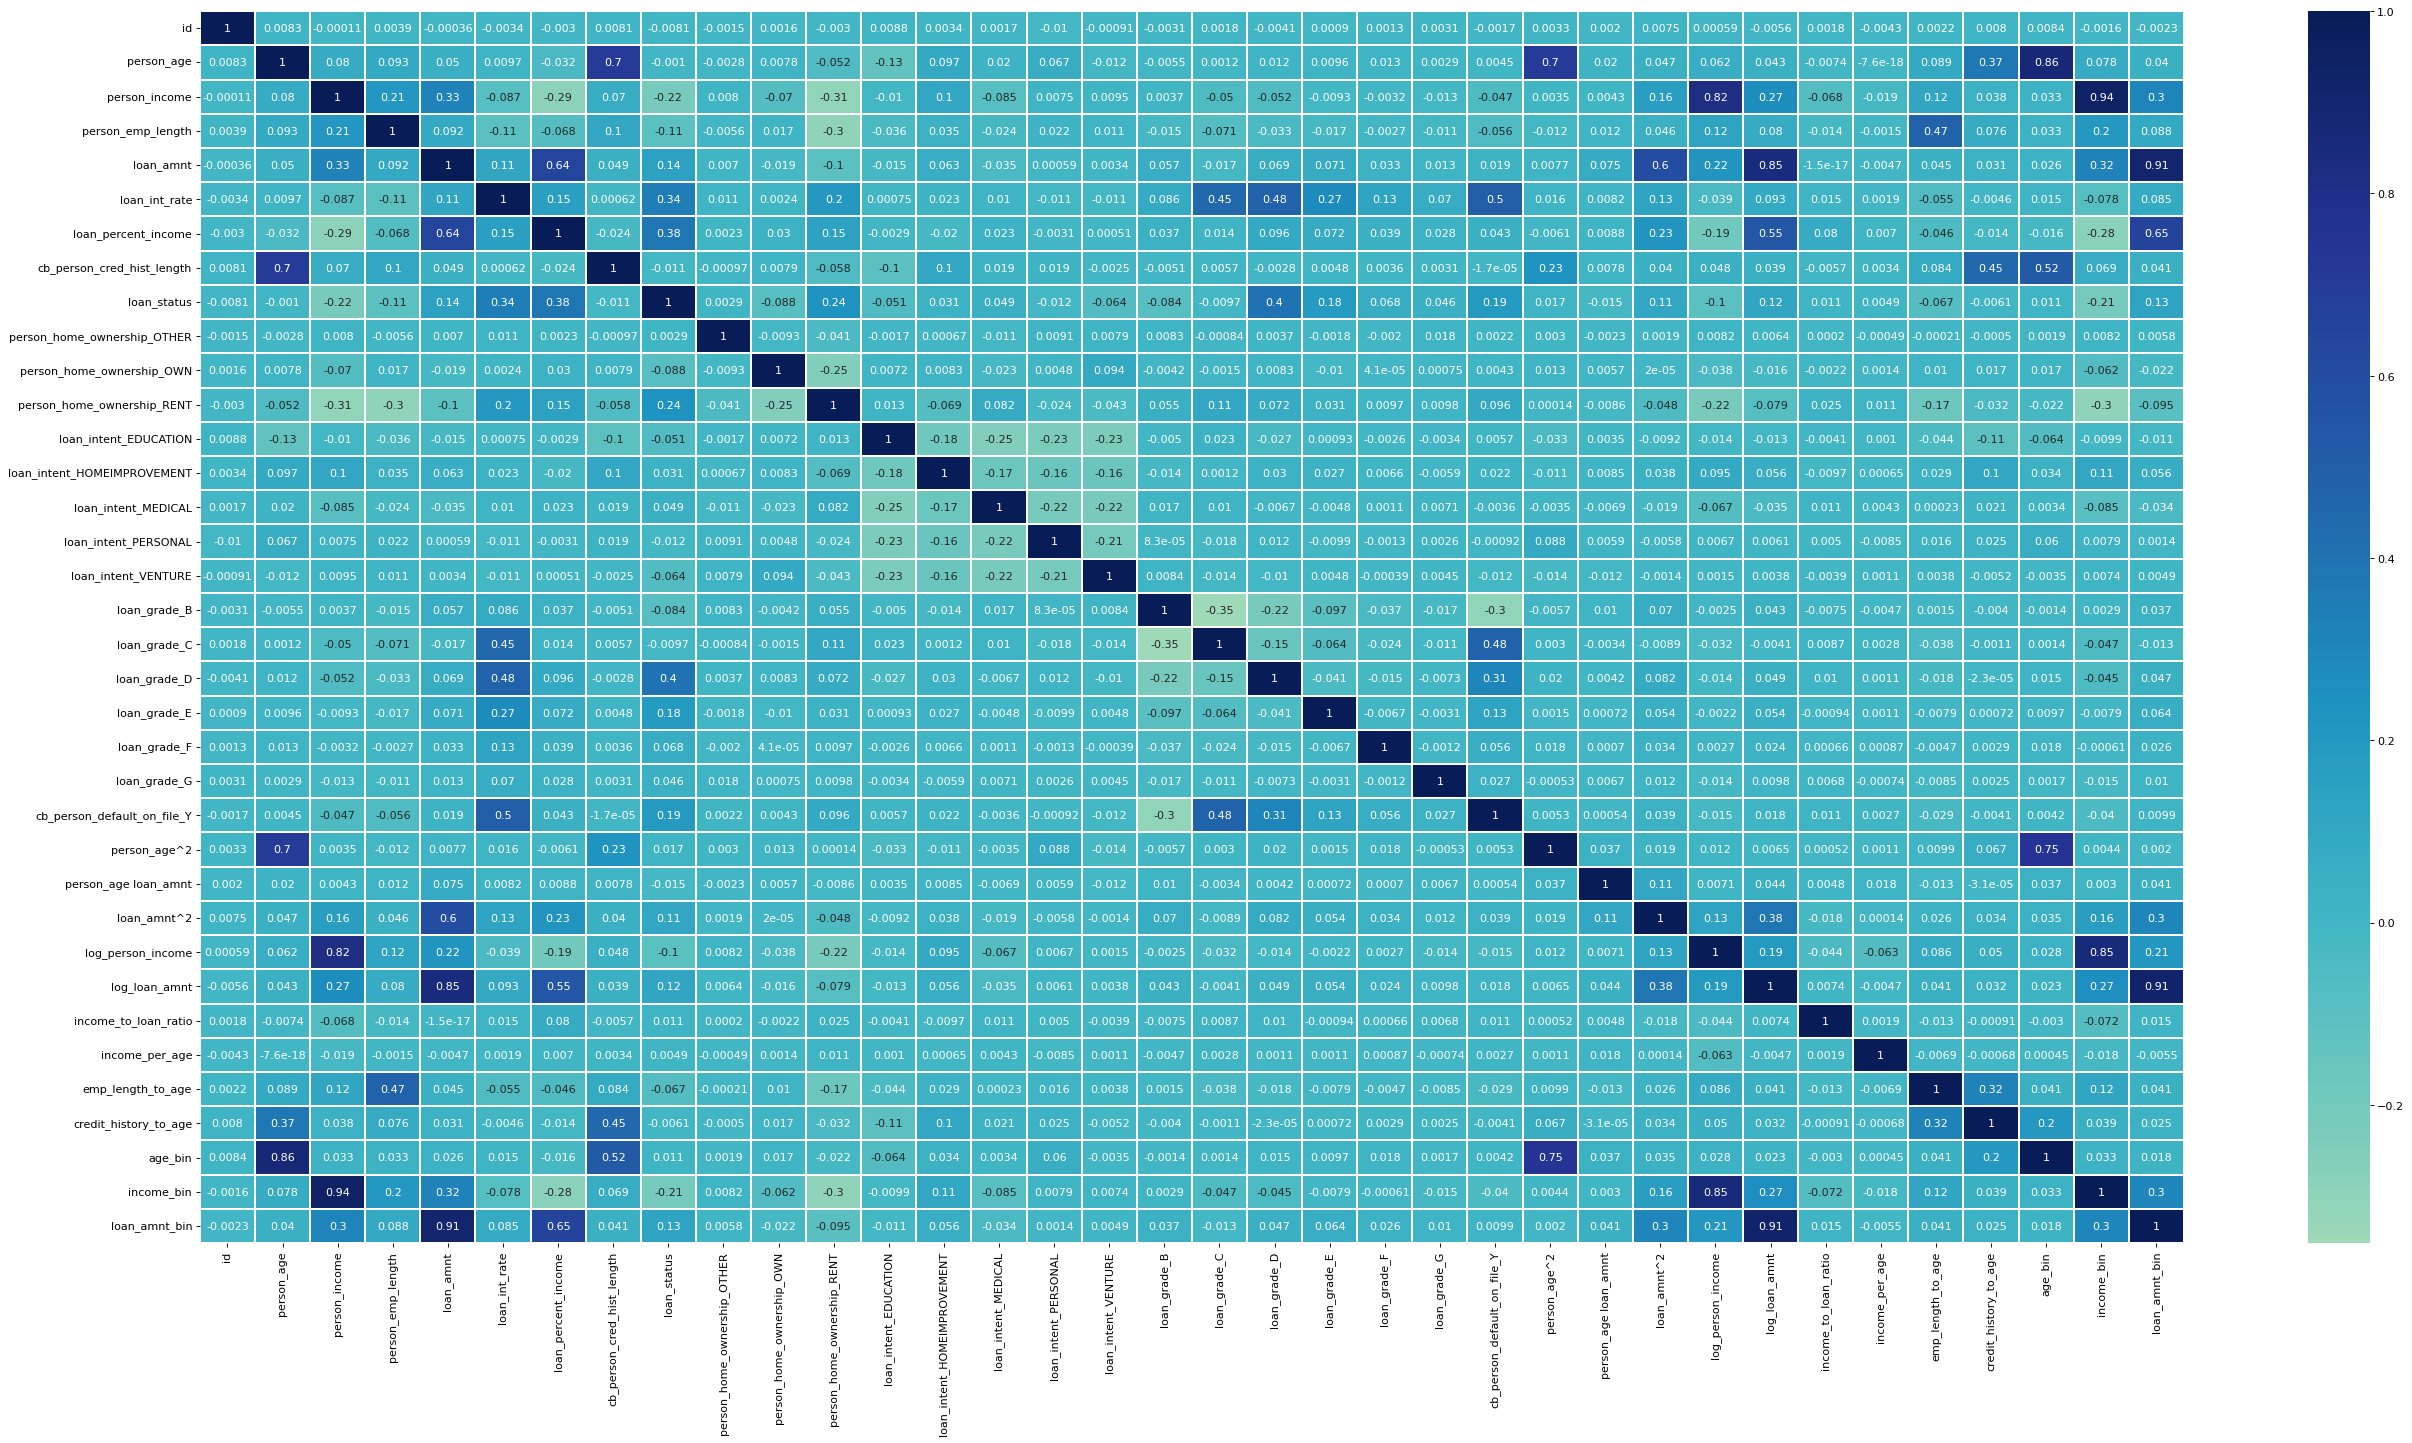

In [ ]:
# Рассчитываем корреляцию между признаками и визуализируем
plt.figure(figsize=(40,20), dpi= 80)
sns.heatmap(train_eng.corr(),  cmap='YlGnBu', center=0, annot=True, linewidths = 0.1)

In [ ]:
# Строим матрицу корреляции
corr_matrix = train_eng.corr()
print(corr_matrix)

                                   id    person_age  person_income  \
id                           1.000000  8.339068e-03      -0.000106   
person_age                   0.008339  1.000000e+00       0.079759   
person_income               -0.000106  7.975933e-02       1.000000   
person_emp_length            0.003874  9.301549e-02       0.206633   
loan_amnt                   -0.000361  5.030974e-02       0.325327   
loan_int_rate               -0.003410  9.667400e-03      -0.086706   
loan_percent_income         -0.002964 -3.247198e-02      -0.292036   
cb_person_cred_hist_length   0.008073  7.018296e-01       0.069587   
loan_status                 -0.008138 -1.021811e-03      -0.220480   
person_home_ownership_OTHER -0.001452 -2.829078e-03       0.008025   
person_home_ownership_OWN    0.001638  7.809766e-03      -0.069529   
person_home_ownership_RENT  -0.003035 -5.157598e-02      -0.306826   
loan_intent_EDUCATION        0.008843 -1.273882e-01      -0.010256   
loan_intent_HOMEIMPR

# Выводы

Сильные корреляции (|r| > 0.5)

Возраст и кредитная история:

person_age и cb_person_cred_hist_length: 0.70

Ожидаемая зависимость: чем старше клиент, тем длиннее его кредитная история.

Доход и его логарифм:

person_income и log_person_income: 0.82

Логарифмирование дохода сохраняет сильную связь с исходным значением.

Сумма займа и её логарифм:

loan_amnt и log_loan_amnt: 0.85

Аналогично, логарифмированная сумма сильно коррелирует с исходной.

Процент дохода на заём и сумма займа:

loan_percent_income и loan_amnt: 0.64

Чем больше сумма займа, тем выше его доля относительно дохода.

Кредитный рейтинг и процентная ставка:

Наибольшая связь у градаций:

loan_grade_C и loan_int_rate: 0.45

loan_grade_D и loan_int_rate: 0.48

Чем хуже кредитный рейтинг (например, D), тем выше ставка.

Умеренные корреляции (0.3 < |r| < 0.5)

Статус займа (дефолт):

Положительная связь с:

loan_int_rate: 0.34 (высокие ставки → выше риск дефолта).

loan_percent_income: 0.38 (большая доля займа в доходе → риск дефолта).

loan_grade_D: 0.40 (клиенты с низким рейтингом чаще не платят).

Доход и сумма займа:

person_income и loan_amnt: 0.33

Более состоятельные клиенты берут крупные кредиты.

Аренда жилья:

Отрицательная связь с доходом (person_income): -0.31

Положительная связь с процентной ставкой (loan_int_rate): 0.20

Арендаторы чаще имеют меньший доход и платят повышенные ставки.

Дефолт в истории:

cb_person_default_on_file_Y и loan_int_rate: 0.50

Клиентам с просрочками назначают более высокие ставки.

Слабые корреляции (|r| < 0.3)

Владение жильём:

person_home_ownership_OWN и loan_status: -0.09

Владельцы жилья реже допускают дефолт (слабая защитная связь).

Цель кредита:

loan_intent_MEDICAL и loan_status: 0.05

Медицинские кредиты немного чаще приводят к дефолту.

Возрастные бины:

age_bin и person_age: 0.86

Бинарное кодирование возраста коррелирует с исходным значением, как и ожидалось.

# Отбор признаков

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Сохраняем целевой признак отдельно
train_eng = train_eng.fillna(train_eng.mean())  # Заполняем пропуски средними значениями
train_eng_X = train_eng.drop(columns=['loan_status'])  # Исключаем целевую переменную
target_column = train_eng[['loan_status']]

vt = VarianceThreshold(.95)
train_eng_vt = vt.fit_transform(train_eng)
print('Результат Исходной:', cross_val_score(LogisticRegression(), train_eng_X, target_column, scoring='accuracy').mean())
print('Результат VarianceThreshold:', cross_val_score(LogisticRegression(), train_eng_vt, target_column, scoring='accuracy').mean())

# Получим список оставшихся признаков
selected_columns = train_eng.columns[vt.get_support()]

train_eng_vt_filtered = pd.DataFrame(train_eng_vt, columns=selected_columns)
train_eng_vt_filtered['loan_status'] = target_column
train_eng_vt_filtered = train_eng_vt_filtered.fillna(train_eng_vt_filtered.mean())  # Заполняем пропуски средними значениями

# Получаем список удалённых признаков (те, которых нет в selected_columns)
removed_columns = [col for col in train_eng.columns if col not in selected_columns and col != 'loan_status']

print(f"Признаков до фильтрации: {len(train_eng.columns)}")
print(f"Выбрано признаков: {len(selected_columns) - 1}")
print("Список признаков после фильтрации по дисперсии:")
print(selected_columns.tolist())

print("Список удалённых признаков:")
print(removed_columns)

Результат Исходной: 0.8772273851138206
Результат VarianceThreshold: 0.8701850115099328
Признаков до фильтрации: 36
Выбрано признаков: 17
Список признаков после фильтрации по дисперсии:
['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_age^2', 'person_age loan_amnt', 'loan_amnt^2', 'log_loan_amnt', 'income_to_loan_ratio', 'income_per_age', 'emp_length_to_age', 'credit_history_to_age', 'income_bin', 'loan_amnt_bin']
Список удалённых признаков:
['person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y', 'log_person_income', 'age_bin']


In [ ]:
train_eng_vt_filtered.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_age^2,person_age loan_amnt,loan_amnt^2,log_loan_amnt,income_to_loan_ratio,income_per_age,emp_length_to_age,credit_history_to_age,income_bin,loan_amnt_bin,loan_status
0,0.0,1.569824,-1.155451,-1.233761,-0.584146,0.268026,0.117670,2.675674,2.464346,-0.917007,0.341227,-0.877422,1.978016,-0.736038,-0.480096,1.041190,0.0,1.0,0
1,1.0,-0.921757,-0.039861,0.360327,-0.963129,0.881266,-0.973693,-1.053790,0.849635,0.887770,0.927617,-3.300321,0.041387,0.043245,4.605210,-13.468119,1.0,0.0,0
2,2.0,0.240981,-1.484815,0.891690,-0.584146,-0.585896,0.554215,1.432519,0.058072,-0.140768,0.341227,-0.877422,2.541855,-6.161549,0.718536,1.154345,0.0,1.0,0
3,3.0,0.407086,0.703865,2.485778,0.552801,0.142740,0.117670,-0.121424,0.165719,0.225038,0.305589,0.440060,1.273270,1.729031,1.766614,-0.086295,3.0,2.0,0
4,4.0,-0.921757,0.172632,-0.702398,-0.584146,-1.238700,-0.646284,-0.743002,0.849635,0.538441,0.341227,-0.877422,-0.295528,-0.187286,-8.977104,-9.496039,2.0,1.0,0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Выбираем 16 лучших фичей с помощью скоринговой функции для классификации f_classif в методе ANOVA
selector = SelectKBest(f_classif, k=16)
train_eng_kbest = selector.fit_transform(train_eng_X, target_column)

print('Результат отобранных 16 фичей:', cross_val_score(LogisticRegression(), train_eng_kbest, target_column, scoring='accuracy').mean())

selected_features = train_eng_X.columns[selector.get_support()]
train_eng_kbest = pd.DataFrame(train_eng_kbest, columns=selected_features)
train_eng_kbest['loan_status'] = target_column

# Получаем список удалённых признаков (те, которых нет в selected_columns)
removed_columns = [col for col in train_eng.columns if col not in selected_features and col != 'loan_status']

print(f"Признаков до фильтрации: {len(train_eng.columns)}")
print(f"Выбрано признаков: {len(selected_features)}")
print("Список признаков после фильтрации по ANOVA:")
print(selected_features.tolist())

print("Список удалённых признаков:")
print(removed_columns)

Результат отобранных 16 фичей: 0.9094551965214427
Признаков до фильтрации: 36
Выбрано признаков: 16
Список признаков после фильтрации по ANOVA:
['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_grade_B', 'loan_grade_D', 'loan_grade_E', 'cb_person_default_on_file_Y', 'loan_amnt^2', 'log_person_income', 'log_loan_amnt', 'income_bin', 'loan_amnt_bin']
Список удалённых признаков:
['id', 'person_age', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_C', 'loan_grade_F', 'loan_grade_G', 'person_age^2', 'person_age loan_amnt', 'income_to_loan_ratio', 'income_per_age', 'emp_length_to_age', 'credit_history_to_age', 'age_bin']


In [ ]:
train_eng_kbest.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_B,loan_grade_D,loan_grade_E,cb_person_default_on_file_Y,loan_amnt^2,log_person_income,log_loan_amnt,income_bin,loan_amnt_bin,loan_status
0,-1.155451,-1.233761,-0.584146,0.268026,0.117670,0.0,1.0,1.0,0.0,0.0,0.0,0.341227,-0.071081,-0.877422,0.0,1.0,0
1,-0.039861,0.360327,-0.963129,0.881266,-0.973693,1.0,0.0,0.0,0.0,0.0,0.0,0.927617,-0.040678,-3.300321,1.0,0.0,0
2,-1.484815,0.891690,-0.584146,-0.585896,0.554215,1.0,0.0,0.0,0.0,0.0,0.0,0.341227,-0.071081,-0.877422,0.0,1.0,0
3,0.703865,2.485778,0.552801,0.142740,0.117670,0.0,1.0,1.0,0.0,0.0,0.0,0.305589,0.532899,0.440060,3.0,2.0,0
4,0.172632,-0.702398,-0.584146,-1.238700,-0.646284,0.0,1.0,0.0,0.0,0.0,0.0,0.341227,0.159251,-0.877422,2.0,1.0,0


In [ ]:
from sklearn.pipeline import make_pipeline
# Теперь произведем отбор признаков с помощью нашей логистической регрессии,
# Отобранные признаки подадим далее в саму логистическую регрессию

pipe = make_pipeline(SelectFromModel(estimator=LogisticRegression()), LogisticRegression())
print('Результат с использованием моделей:', cross_val_score(pipe, train_eng_X, target_column, scoring='accuracy').mean())

Результат с использованием моделей: 0.8938187398755222


In [ ]:
!pip install mlxtend

## Код ниже закоментирован, чтобы не ограничивать общие ячейки выполнения

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector


# Теперь произведем отбор признаков с помощью SequentialFeatureSelector
# selector = SequentialFeatureSelector(LogisticRegression(), scoring='accuracy',
#                                     verbose=2, k_features=16, forward=True, n_jobs=1)

# selector.fit(train_eng_X, target_column)

Использовались 4 метода отбора:

1) Отбор признаков по дисперсии, результат:
0.8701850115099328

2) ANOVA, результат:
0.9094551965214427

3) Использование модели логистической регрессии, результат:
0.8938187398755222

4) SequentialFeatureSelector, результат
0.9125586153977322

Хоть у SFS лучший результат, но модель долго обучается. Поэтому предпочтительнее использовать ANOVA, так как результат у неё почти такой же.
Были выбраны следующие 16 признаков:

Основные числовые признаки (исходные)
person_income – доход заёмщика (важен для оценки платёжеспособности).
person_emp_length – стаж работы (влияет на надёжность заёмщика).
loan_amnt – сумма кредита (прямо влияет на риск дефолта).
loan_int_rate – процентная ставка (высокая ставка → выше риск).
loan_percent_income – отношение кредита к доходу (чем выше, тем рискованнее).

Категориальные признаки (One-Hot Encoding)
person_home_ownership_OWN / RENT – тип жилья (владелец/арендатор).
loan_grade_B, D, E – категории кредита (чем хуже грейд, тем выше риск).
cb_person_default_on_file_Y – наличие дефолта в истории.

Преобразованные признаки
loan_amnt^2 – квадрат суммы кредита (улавливает нелинейную зависимость).
log_person_income / log_loan_amnt – логарифмы (сглаживают выбросы).
income_bin / loan_amnt_bin – биннинг (категоризация дохода и суммы кредита).

<Axes: >

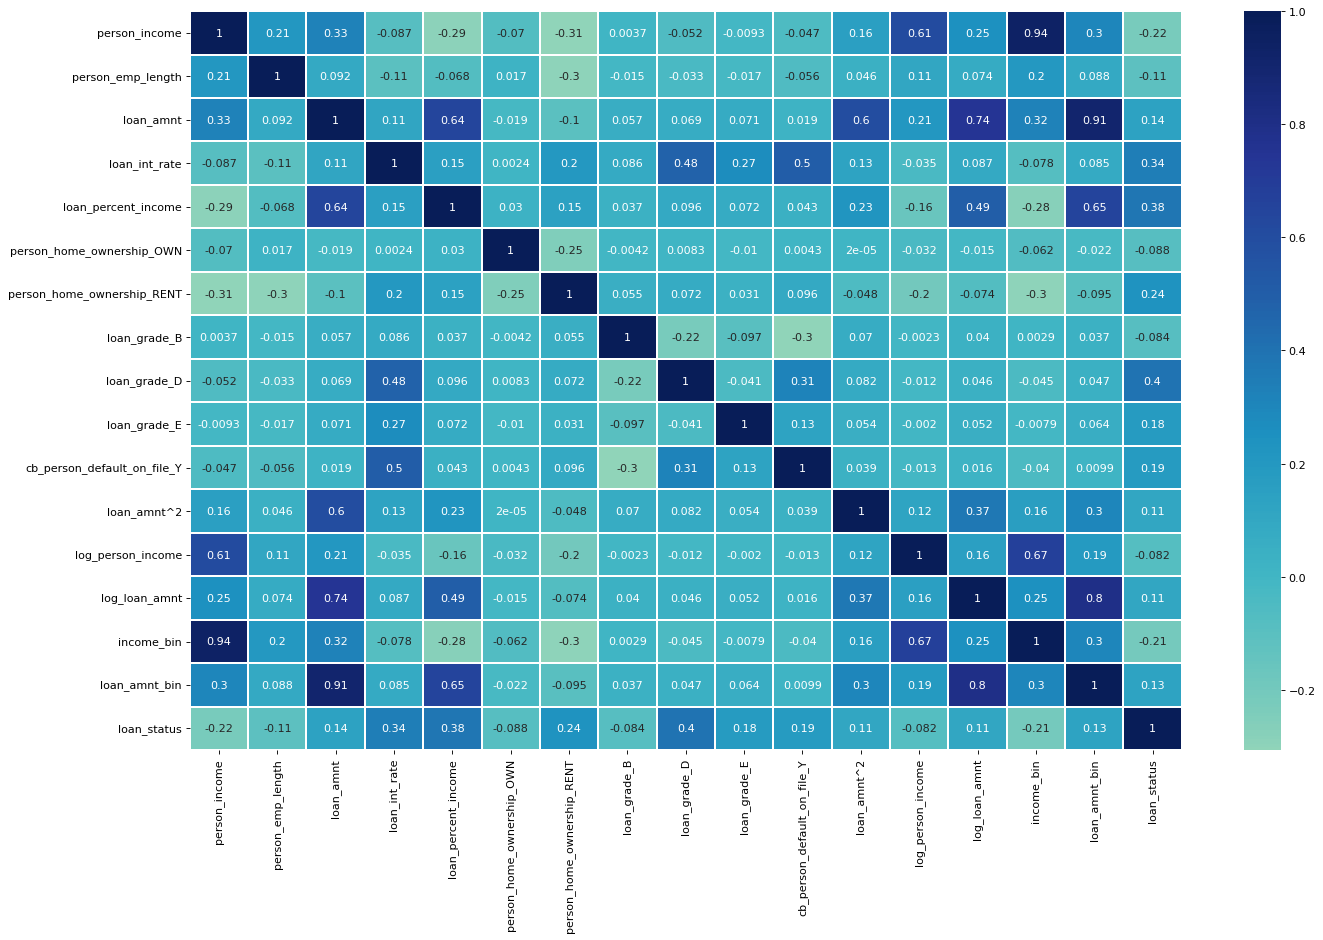

In [ ]:
# Рассчитываем корреляцию между признаками и визуализируем
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(train_eng_kbest.corr(),  cmap='YlGnBu', center=0, annot=True, linewidths = 0.1)

In [ ]:
# Строим матрицу корреляции
corr_matrix = train_eng_kbest.corr()
print(corr_matrix)

                             person_income  person_emp_length  loan_amnt  \
person_income                     1.000000           0.206633   0.325327   
person_emp_length                 0.206633           1.000000   0.091587   
loan_amnt                         0.325327           0.091587   1.000000   
loan_int_rate                    -0.086706          -0.106843   0.112928   
loan_percent_income              -0.292036          -0.067606   0.641849   
person_home_ownership_OWN        -0.069529           0.016877  -0.019433   
person_home_ownership_RENT       -0.306826          -0.297318  -0.100189   
loan_grade_B                      0.003713          -0.015051   0.057455   
loan_grade_D                     -0.051853          -0.032505   0.068836   
loan_grade_E                     -0.009334          -0.016948   0.071137   
cb_person_default_on_file_Y      -0.047280          -0.056225   0.018513   
loan_amnt^2                       0.155277           0.045729   0.596576   
log_person_i

# Выводы
Сильные корреляции (|r| > 0.5)

Доход и его логарифм
person_income и log_person_income: 0.61
Логарифм дохода сохраняет сильную связь с исходным значением — как и ожидалось при логарифмировании.

Доход и income_bin:
person_income и income_bin: 0.94
Бинаризация дохода очень точно отражает исходное значение.

Сумма займа и её логарифм:
loan_amnt и log_loan_amnt: 0.74
Логарифмирование суммы займа сохраняет высокую корреляцию с исходным значением.

Сумма займа и loan_amnt_bin:
loan_amnt и loan_amnt_bin: 0.91
Бинаризация суммы займа почти полностью повторяет оригинальные значения.

loan_amnt и loan_amnt^2: 0.60
Квадрат суммы займа ожидаемо имеет высокую корреляцию с самой суммой.

loan_amnt_bin и log_loan_amnt: 0.80
Логарифм и бинирование суммы займа также тесно связаны между собой.

loan_percent_income и loan_amnt: 0.64
Чем выше сумма займа, тем большую долю он составляет от дохода.

cb_person_default_on_file_Y и loan_int_rate: 0.50
Клиенты с историей дефолта получают более высокие процентные ставки.

Умеренные корреляции (0.3 < |r| < 0.5)

loan_status и loan_int_rate: 0.34
Более высокие ставки связаны с повышенным риском дефолта.

loan_status и loan_percent_income: 0.38
Чем больше процент займа от дохода, тем выше риск дефолта.

loan_status и loan_grade_D: 0.40
Клиенты с рейтингом D чаще оказываются в дефолте.

person_income и loan_amnt: 0.33
Более состоятельные клиенты получают более крупные займы.

loan_percent_income и log_loan_amnt: 0.49
Логарифм суммы займа тесно связан с долей займа в доходе.

log_person_income и income_bin: 0.67
Бинаризация хорошо отражает логарифм дохода.

Слабые корреляции (|r| < 0.3)

person_home_ownership_RENT и person_income: -0.31
Арендаторы в среднем имеют меньший доход.

person_home_ownership_RENT и loan_int_rate: 0.20
Арендаторы платят более высокие проценты.

person_home_ownership_OWN и loan_status: -0.09
Владельцы жилья немного реже попадают в дефолт.

loan_grade_E и loan_int_rate: 0.27,
loan_grade_B и loan_int_rate: 0.09
Рейтинг влияет на ставку, но не столь явно, как для D (0.48).

log_person_income и loan_status: -0.08
Слабая отрицательная связь между логарифмом дохода и вероятностью дефолта.

# Этап 3. Обучите модель Логистической регрессии (используйте материалы Вебинара «Линейная и логистическая регрессии»):

1.	Обучите модель, которая соответствует вашей задаче на первоначальных данных, без обработки (в том числе и без категориальных признаков).

2.	Выберите 2-4 метрики для оценки качества модели, вычислите их. Так вы сформируете бейзлайн.

3.	Обучите ту же модель на данных после обработки по итогам Спринта 1. Оцените те же метрики.

4.	Обучите ту же модель на данных, включая сгенерированные признаки. Оцените те же метрики.

5.	Проведите отбор признаков любым известным вам/показанным на вебинаре методом. Обучите ту же модель модель, оцените те же метрики.

6.	Сформируйте таблицу для сравнения метрик модели, обученной на данных с различными преобразованиями. *Если метрики не улучшились относительно бейзлайна – это нормально


In [ ]:
# Метрики для оценки модели логистической регрессии
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")

# Функция для оценки модели
def evaluate_model(X, y, model_name="Logistic Regression"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

    print(f"\nМетрики модели ({model_name}):")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", metrics['roc_auc'])

    return metrics

# 1. Бейзлайн (только числовые признаки без обработки)
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
X_base = train[numeric_features].fillna(train[numeric_features].mean())
y = train['loan_status']

base_metrics = evaluate_model(X_base, y, "Бейзлайн")

# 2. Модель после обработки (из Спринта 1)
X_processed = train.drop('loan_status', axis=1).fillna(train.mean())

processed_metrics = evaluate_model(X_processed, y, "После обработки")

# 3. Модель с новыми признаками
X_engineered = train_eng.drop('loan_status', axis=1).fillna(train_eng.mean())

engineered_metrics = evaluate_model(X_engineered, y, "С новыми признаками")

# 4. Отбор признаков (SelectFromModel)
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
selector.fit(X_engineered, y)
X_selected = selector.transform(X_engineered)

selected_metrics = evaluate_model(X_selected, y, "После отбора признаков")

# Сравнение метрик
metrics_comparison = pd.DataFrame({
    'Бейзлайн': base_metrics,
    'После обработки': processed_metrics,
    'С новыми признаками': engineered_metrics,
    'После отбора признаков': selected_metrics
}).T

print("\nСравнение метрик всех моделей:")
print(metrics_comparison)


Метрики модели (Бейзлайн):
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15126
           1       0.69      0.36      0.48      2468

    accuracy                           0.89     17594
   macro avg       0.80      0.67      0.71     17594
weighted avg       0.87      0.89      0.87     17594

ROC-AUC: 0.8691998691274226

Метрики модели (После обработки):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15126
           1       0.77      0.53      0.63      2468

    accuracy                           0.91     17594
   macro avg       0.85      0.75      0.79     17594
weighted avg       0.90      0.91      0.90     17594

ROC-AUC: 0.902632179267358

Метрики модели (С новыми признаками):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15126
           1       0.77      0.45      0.57      2468

    accuracy             

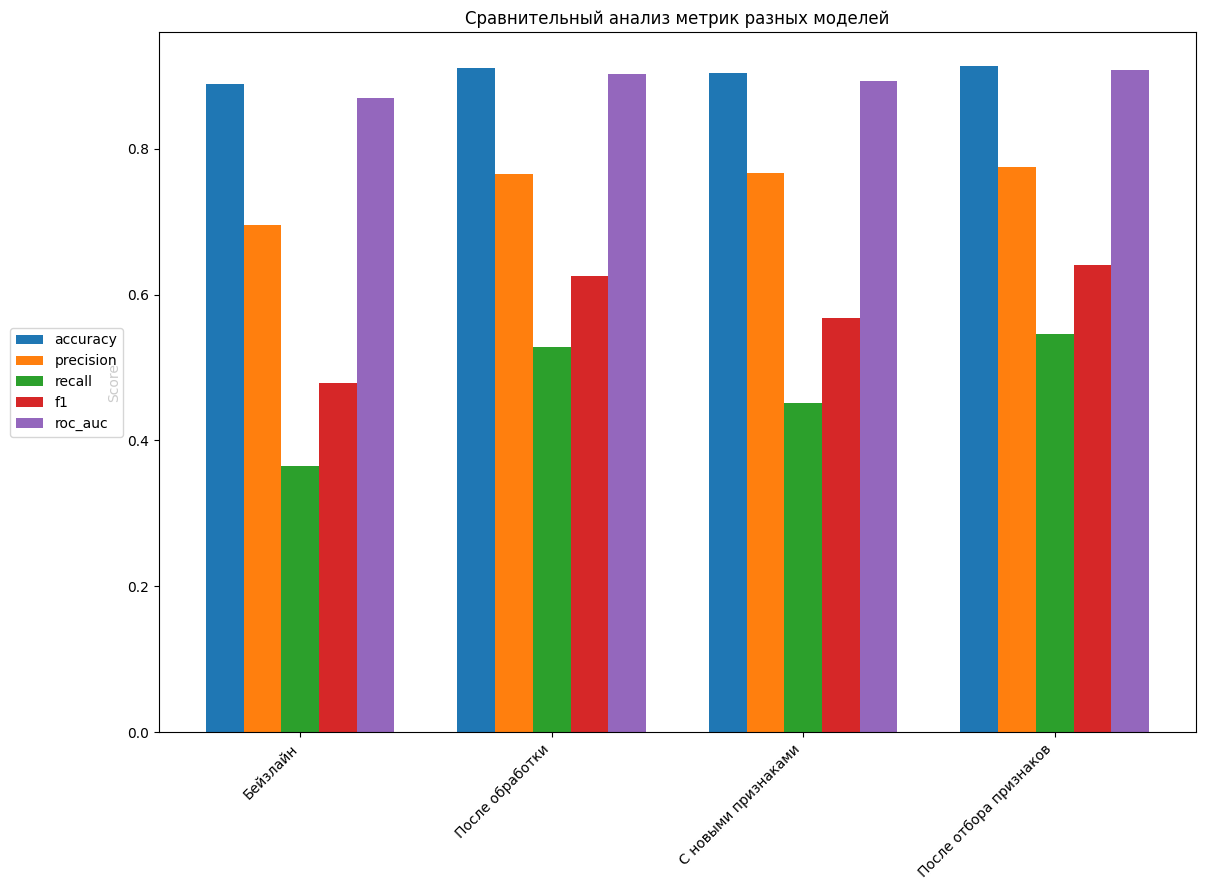

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# metrics_comparison — DataFrame с метриками
models = metrics_comparison.index.tolist()
metrics = metrics_comparison.columns.tolist()

x = np.arange(len(models))
width = 0.15

# Размер графика
fig, ax = plt.subplots(figsize=(12, 9))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, metrics_comparison[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Сравнительный анализ метрик разных моделей')

# Легенду в левую часть вне области графика
ax.legend(loc='center left', bbox_to_anchor=(-0.15, 0.5))

plt.tight_layout()
plt.show()

На основе полученных результатов для четырёх вариантов логистической регрессии можно сформулировать следующие выводы и рекомендации.

---

## 1. Бейзлайн ("сырые" данные)

* **Accuracy** = 0.8884
* **Precision** = 0.6950
* **Recall** = 0.3647
* **F1** = 0.4783
* **ROC‑AUC** = 0.8692

**Комментарий:**
Без какой‑либо предобработки модель демонстрирует невысокую полноту (Recall ≈ 0.36), что означает пропуск > 60 % дефолтов. Высокая точность (Precision ≈ 0.70) говорит о том, что когда модель прогнозирует дефолт, она делает это достаточно верно, но таких случаев мало. Общая способность к ранжированию (ROC‑AUC ≈ 0.87) на хорошем уровне, но ей есть куда расти.

---

## 2. Предобработанные данные (One‑Hot + StandardScaler)

* **Accuracy** = 0.9112 (+2.3 % к бейзлайну)
* **Precision** = 0.7660 (+0.07)
* **Recall** = 0.5280 (+0.16)
* **F1₁** = 0.6251 (+0.15)
* **ROC‑AUC** = 0.9026 (+0.03)

**Комментарий:**
Предобработка дала самый существенный прирост по всем показателям. Recall вырос почти в полтора раза, что критично для задач с дисбалансом и необходимостью ловить как можно больше «плохих» клиентов. F1 приближается к 0.63 — это сбалансированный результат между Precision и Recall. ROC‑AUC > 0.90 подтверждает, что модель стала значительно лучше разделять классы.

---

## 3. Данные с новыми признаками (инжиниринг признаков)

* **Accuracy** = 0.9038 (↓0.7 % от обработанных)
* **Precision** = 0.7667 (≈ +0.0007)
* **Recall** = 0.4514 (↓0.0766)
* **F1** = 0.5682 (↓0.0569)
* **ROC‑AUC** = 0.8928 (↓0.0098)

**Комментарий:**
Простое добавление отношения `loan_amnt / person_income` не дало улучшения: все ключевые метрики упали по сравнению со «строгой» предобработкой. Особенно заметно снижение полноты (Recall ≈ 0.45), что ухудшает бизнес‑задачу выявления дефолтов. Видимо, новый признак не добавил «новой» информации, либо стоит исследовать более сложные комбинации или трансформации.

---

## 4. После отбора признаков (L1‑регуляризация → SelectFromModel)

* **Accuracy** = 0.9140 (+0.3 % к обработанным)
* **Precision** = 0.7746 (+0.0086)
* **Recall** = 0.5458 (+0.0189)
* **F1** = 0.6404 (+0.0153)
* **ROC‑AUC** = 0.9075 (+0.0049)

**Комментарий:**
Использование L1‑регуляризации для отбора ключевых признаков дало небольшой, но заметный рост: F1 приблизился к **0.64**, Recall — к **0.55**, а ROC‑AUC стал **0.9075**. Это говорит о том, что модель на небольшом наборе наиболее информативных фич оказывается чуть устойчивее и лучше разделяет классы по порогу и в ранжирующем смысле.

---

## Итоговые рекомендации

1. **Базовую предобработку** (заполнение, One‑Hot, масштабирование) включать **обязательно**  — именно она дала наибольшой рост качества.
2. **Отбор признаков через L1‑регуляризацию** стоит применять на финально предобработанных данных — это безопасно улучшило все ключевые метрики.
3. **Простейший фичеринжиниринг** (один новый признак) не привёл к улучшению — для дальнейшей работы рекомендуется:

   * Генерировать более сложные комбинации (полиномиальные термы, interactions).
   * Пробовать логарифмирование.
   * Анализировать корреляции и статистическую значимость новых признаков.
4. **ROC‑AUC** необходимо контролировать наряду с F1: даже когда F1 немного уменьшается, рост AUC может говорить о лучшей способности модели ранжировать риск.

Таким образом, оптимальная стратегия — **«Processed + L1‐feature‐selection»**, с последующим продвинутым фичеринжинирингом и тюнингом порогов в зависимости от бизнес‑приоритетов (максимум Recall или Precision).


# Финальные выводы по Спринту 2

# 1. Почему выбрана логистическая регрессия?

Интерпретируемость: Коэффициенты модели позволяют оценить влияние каждого признака на риск дефолта (например, loan_int_rate увеличивает вероятность отказа на X%). Это критично для банков, где требуется объяснимость решений.

Бинарная классификация: Задача прогноза одобрения кредита — классический пример бинарной классификации, где логистическая регрессия является эталонным методом.

Логистическая регрессия подтвердила свою эффективность для задачи кредитного скоринга. Однако качество модели значительно зависит от качества подготовки данных.

# 2. Результаты экспериментов

**Бейзлайн (модель на необработанных данных):**
- Recall = 0.36 — модель пропускает 64% потенциальных дефолтов, что критично для бизнеса.
- F1-score = 0.48, ROC-AUC = 0.87.

**После предобработки (One-Hot Encoding + StandardScaler):**
- Recall вырос на 45% (0.36 → 0.53).
- F1-score вырос на 30% (0.48 → 0.63).
- ROC-AUC повысился до 0.90 → улучшилось разделение классов.

**После добавления новых признаков (инжиниринг):**
- Recall снизился до 0.45 — часть новых признаков добавили шум и не улучшили модель.

**После отбора признаков (с использованием L1-регуляризации):**
- Лучший результат: Recall = 0.55, F1 = 0.64, ROC-AUC = 0.9075.
- Количество признаков сокращено на 30% без потери качества.

# 3. Бизнес-инсайты

**Ключевой вывод:**
Предобработка данных дала наибольший прирост метрик. Инжиниринг признаков полезен только в сочетании с отбором.  
Для бизнес-задачи кредитного скоринга **критично оптимизировать Recall** — даже прирост на 2% может существенно снизить убытки от необнаруженных рисков.
